# *Auto-Sklearn* para previsão de *Churn*

Nesse projeto eu irei aplicar a biblioteca de *Auto Machine Learning Auto-Sklearn* para gerar um modelo que preveja o *Churn* de clientes de uma empresa de Telecomunicações. A vantagem do processo de *Auto Machine Learning* é que todo processo de escolha, treinamento e *tunning* do modelo é algo automático, permitindo que tempo e esforço sejam aplicados para outras áreas do projeto.

#### O que é *churn* ?

*Churn* é uma métrica que indica o quanto uma empresa perdeu de receita ou clientes. Para calcular o *churn*, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de *churn rate*. Essa métrica também usada em departamentos de pessoas para analisar a rotatividade de funcionários de uma empresa em um determinado setor ou em toda a empresa.

## Dados

Os dados são da plataforma *Kaggle* e podem ser obtidos [aqui](https://www.kaggle.com/blastchar/telco-customer-churn). A base de dados conta com 7043 observações e 21 colunas.

Nessas *features* constam :

1) Clientes que saíram no último mês - a coluna é chamada de *churn*;

2) Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes;

3) Informações da conta do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais;

4) e informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes;

**Descrição das variáveis**

1) *customerID* : Código do cliente;

2) *gender* : Gênero do cliente;

3) *SeniorCitizen* : Se o cliente é um cidadão idoso ou não (1, 0);

4) *Partner* : Se o cliente tem um parceiro ou não (Sim, Não);

5) *Dependents* : Se o cliente tem dependentes ou não (Sim, Não);

6) *tenure* : Número de meses que o cliente permaneceu na empresa; 

7) *PhoneService* : Se o cliente tem um serviço de telefone ou não (Sim, Não);

8) *MultipleLines* : Se o cliente tem várias linhas ou não (Sim, Não, Sem serviço telefônico);

9) *InternetService* : Provedor de serviços de Internet do cliente (DSL, fibra óptica, não);

10) *OnlineSecurity* : Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de Internet);

11) *OnlineBackup* : Se o cliente tem backup online ou não (Sim, Não, Sem serviço de Internet);

12) *DeviceProtection* : Se o cliente tem proteção de dispositivo ou não (Sim, Não, Sem serviço de Internet);

13) *TechSupport* : Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de Internet);

14) *StreamingTV* : Se o cliente tem *streaming* de TV ou não (Sim, Não, Sem serviço de Internet);

15) *StreamingMovies* : Se o cliente tem *streaming* de filmes ou não (Sim, Não, Sem serviço de Internet);

16) *Contract* : A vigência do contrato do cliente (mês a mês, um ano, dois anos);

17) *PaperlessBilling* : Se o cliente tem faturamento sem papel ou não (Sim, Não);

18) *PaymentMethod* : O método de pagamento do cliente (cheque eletrônico, cheque enviado, transferência bancária (automático),etc.;

19) *MonthlyCharges* : O valor cobrado do cliente mensalmente;

20) *TotalCharges* : O valor total cobrado do cliente;

21) *Churn* : Se o cliente mudou ou não (sim ou não).

## Instalação das bibliotecas

In [2]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn
!pip install dask[complete] distributed --upgrade
!pip install "dask[distributed]" --upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Requirement already up-to-date: dask[complete] in /usr/local/lib/python3.7/dist-packages (2021.3.1)
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.3.1)
Requirement already up-to-date: dask[distributed] in /usr/local/lib/python3.7/dist-packages (2021.3.1)


In [3]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 4.4MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics
import autosklearn.classification

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE,SMOTEN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours,AllKNN, CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold
from imblearn.combine import SMOTEENN, SMOTETomek

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


## Importação dos dados

In [30]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

## Análise Exploratória dos dados

Primeiras observações da base de dados.

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Últimas observações da base de dados.

In [5]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Informações sobre as variáveis: Das 21 variáveis, 18 são objetos (valores não numéricos), por isso teremos que transformá-las em numéricas para que possam ser aplicadas no processo de *auto machine learning*.

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Número de valores únicos de cada coluna.

In [7]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Não há valores faltantes.

In [8]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
print('Tabela estatística das variáveis numéricas')
display(churn.describe().T)
print(' '*508)
print("Tabela estatística das variáveis categóricas")
display(churn.describe(include='O').T)

Tabela estatística das variáveis numéricas


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Tabela estatística das variáveis categóricas


,count,unique,top,freq
customerID,7043,7043,8681-ICONS,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Dimensão da base de dados.

In [10]:
churn.shape

(7043, 21)

## Transformações dos dados

Antes de seguir para a análise gráfica é necessário transformar os dados para valores numéricos categóricos, pois muitos estão em formato de texto.

Antes irei excluir a coluna *customerID*, pois ele não é relevante para nossa modelagem.

In [31]:
#Base que usarei para realizar a análise exploratória de dados
churn2=churn
churn2['Churn'] = LabelEncoder().fit_transform(churn2['Churn'])

In [32]:
churn = churn.drop('customerID', axis=1)

Selecionarei todas as colunas que são do tipo objeto.

Com o uso do *loop for* irei transformar as variáveis categóricas em numéricas categóricas.

In [33]:
churn.select_dtypes(['int64','float64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [34]:
lista3 = ['tenure','MonthlyCharges']
for i in lista3:
  churn[i] = (churn[i] - churn[i].mean())/(churn[i].std())

  #SeniorCitizen não é INT64
  #Transformar TotalCharges de object para Float

Transformando as variáveis objetos em variáveis numéricas.

In [35]:
#churn['Churn'] = LabelEncoder().fit_transform(churn['Churn'])

for i in churn.select_dtypes('object').columns:
  churn[i] = LabelEncoder().fit_transform(churn[i])

Abaixo podemos ver que a transformação foi efetuada.

In [36]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277354,0,1,0,0,2,0,0,0,0,0,1,2,-1.160241,2505,0
1,1,0,0,0,0.066323,1,0,0,2,0,2,0,0,0,1,0,3,-0.259611,1466,0
2,1,0,0,0,-1.236636,1,0,0,2,2,0,0,0,0,0,1,3,-0.362635,157,1
3,1,0,0,0,0.514215,0,1,0,2,0,2,2,0,0,1,0,0,-0.746482,1400,0
4,0,0,0,0,-1.236636,1,0,1,0,0,0,0,0,0,0,1,2,0.197351,925,1


E o tipo de dados da base também foi alterado para inteiro (*int64*).

In [37]:
churn.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

Podemos seguir para análise gráfica dos dados.

### Análise gráfica

Conforme os gráficos de barras abaixo temos que:

1) Não aparenta haver diferença entre clientes que deixam a empresa quando tratamos de gênero;

2) Já para a variável *SeniorCitizen*, aqueles **não idosos** são maioria entre os que deixam de ser clientes da empresa.

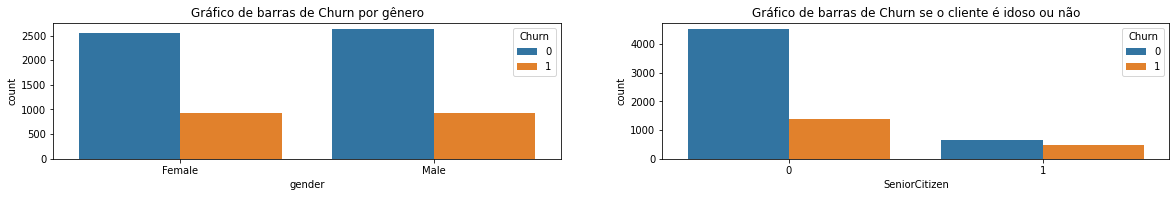

In [38]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por gênero')
ax[1].title.set_text('Gráfico de barras de Churn se o cliente é idoso ou não')
sns.countplot(x='gender', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='SeniorCitizen', data=churn2, hue='Churn', ax=ax[1]);

3) Na variável *MultipleLines*, quem possui e não possui múltiplas linhas telefônicas são os que mais deixam de ser clientes;

4) Em *PhoneService*, deixam de ser clientes aqueles indivíduos que possuem algum serviço telefônico.

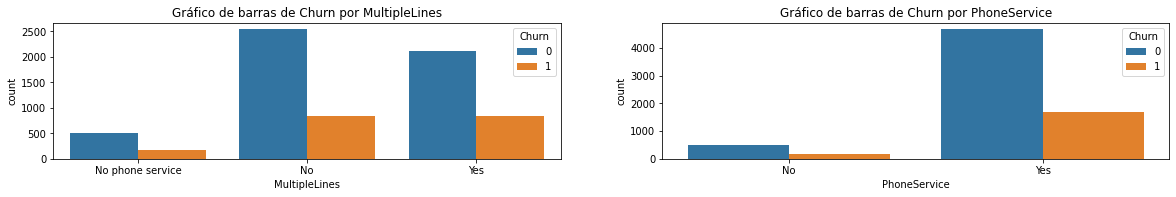

In [39]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por MultipleLines')
ax[1].title.set_text('Gráfico de barras de Churn por PhoneService')
sns.countplot(x='MultipleLines', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='PhoneService', data=churn2, hue='Churn', ax=ax[1]);

No gráfico abaixo vemos o número de meses que um cliente tem até deixar a empresa. Nos primeiros meses, são os meses em que há um maior *churn* de clientes (podemos ver que o primeiro ano como clientes é crucial) e em seguida a quantidade de clientes que deixam a empresa vai caindo.

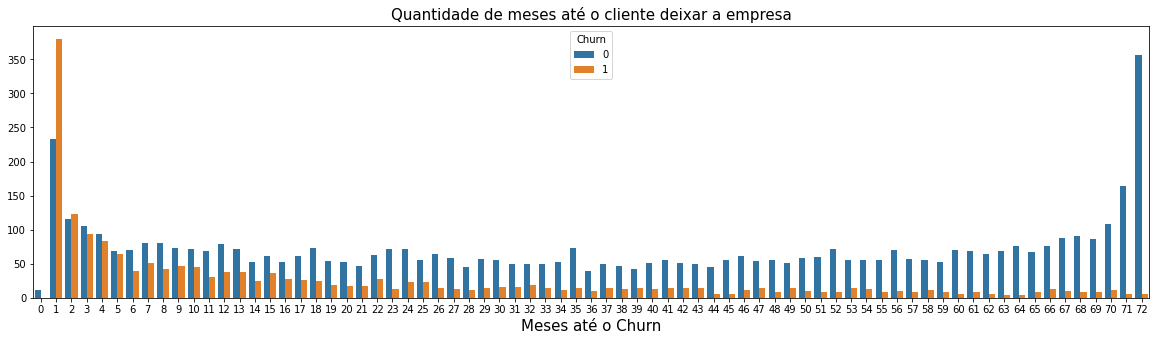

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(x='tenure', data=churn2, hue='Churn')
plt.ylabel('')
plt.xlabel('Meses até o Churn',size=15)
plt.title('Quantidade de meses até o cliente deixar a empresa',size=15);

5) Em *InternetService*, a quantidade maior de *churn* vem de clientes que possuíam o serviço de Fibra Ótica;

6) E indivíduos que não possuem segurança *online* (*OnlineSecurity*), são os que mais deixam de ser clientes;

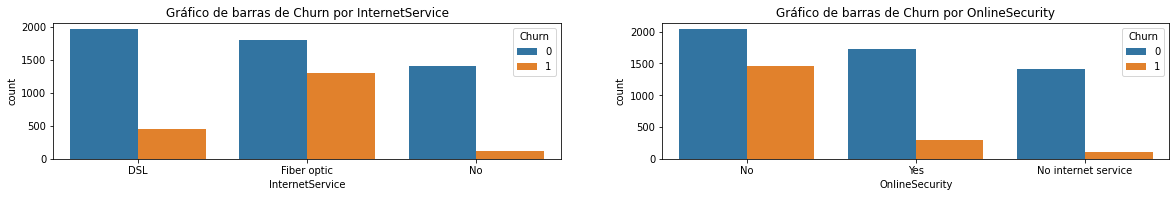

In [41]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por InternetService')
ax[1].title.set_text('Gráfico de barras de Churn por OnlineSecurity')
sns.countplot(x='InternetService', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='OnlineSecurity', data=churn2, hue='Churn', ax=ax[1]);

7) Aqueles que não possuem *backup online* são os que mais deixam de ser clientes;

8) *DeviceProtection* : Clientes sem proteção de dispositivo são os que mais deixam de ser clientes;

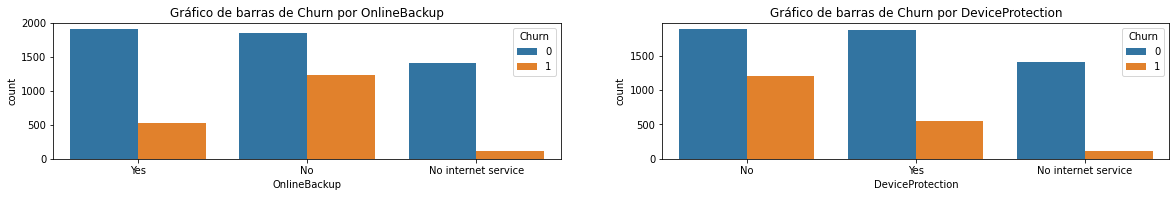

In [42]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por OnlineBackup')
ax[1].title.set_text('Gráfico de barras de Churn por DeviceProtection')
sns.countplot(x='OnlineBackup', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='DeviceProtection', data=churn2, hue='Churn', ax=ax[1]);

9) *TechSupport* : Quem não possui suporte técnico são os que mais deixam de serem clientes;

10) *StreamingTV* : Nessa variável que possui e não possui sistema de *Streaming* debandam da carteira de clientes da empresa;

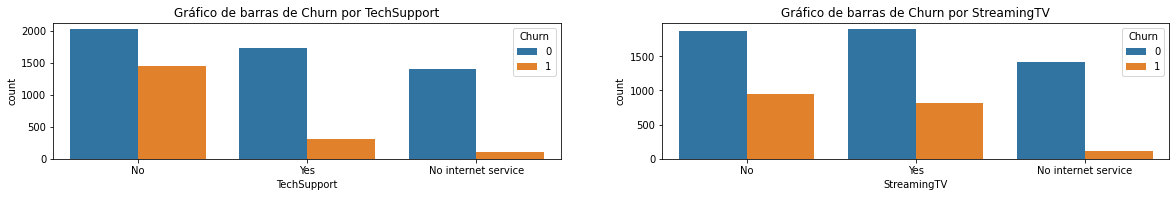

In [43]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por TechSupport')
ax[1].title.set_text('Gráfico de barras de Churn por StreamingTV')
sns.countplot(x='TechSupport', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='StreamingTV', data=churn2, hue='Churn', ax=ax[1]);

11) *StreamingMovies* : Resultado semelhante aos da variável *StreamingTV*;

12) Quem faz contrato mês a mês (*month-to-month*) são os que mais deixam de serem clientes;

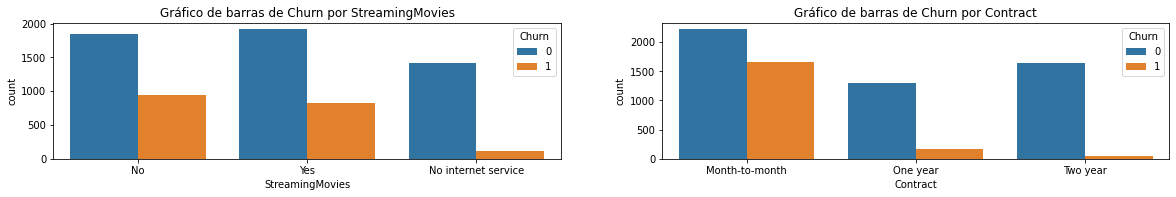

In [44]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por StreamingMovies')
ax[1].title.set_text('Gráfico de barras de Churn por Contract')
sns.countplot(x='StreamingMovies', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='Contract', data=churn2, hue='Churn', ax=ax[1]);

13) Quem tem faturamento sem papel são os que mais deixam de serem clientes;

14) *PaymentMethod* : Aqueles que pagam com cheque eletrônico são os que mais abandonam a carteira de clientes da empresa.

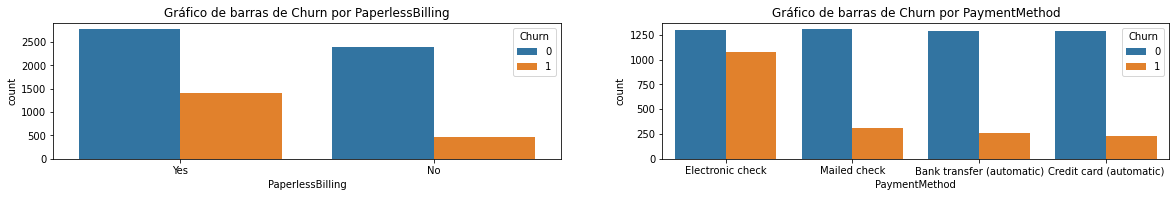

In [45]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por PaperlessBilling')
ax[1].title.set_text('Gráfico de barras de Churn por PaymentMethod')
sns.countplot(x='PaperlessBilling', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='PaymentMethod', data=churn2, hue='Churn', ax=ax[1]);

Abaixo pode-se pobservar o histograma e o *boxplot* da variável *MonthlyCharges*.

A distribuição dos dados não possui a aparência de uma distribuição normal (formato de sino) e o seu *boxplot* não mostra a presenta de valores discrepantes nos dados (*outliers*).

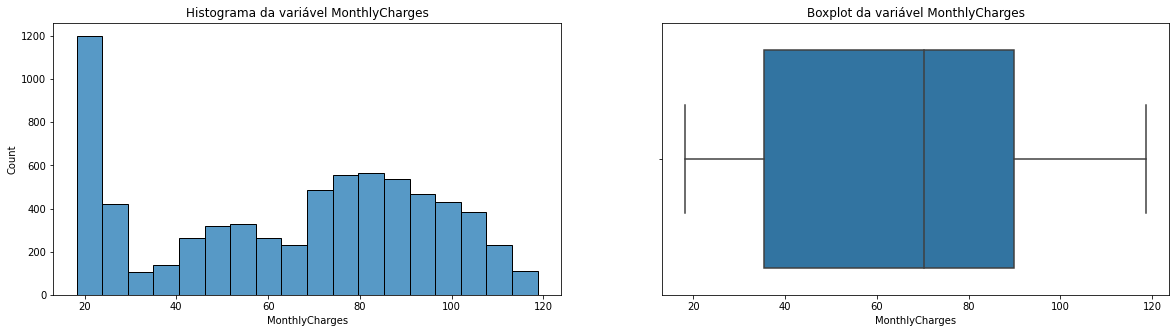

In [46]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('Histograma da variável MonthlyCharges')
ax[1].title.set_text('Boxplot da variável MonthlyCharges')
sns.histplot(x='MonthlyCharges', data=churn2, ax=ax[0])
sns.boxplot(x='MonthlyCharges', data=churn2, ax=ax[1]);

## Modelagem de dados

Separando as *features* e a variável *target* (alvo).

In [47]:
X=churn.drop(["Churn",'TotalCharges'],axis=1)
y=churn['Churn']

Um dos problemas da variável *Churn* as suas classes estão desbalanceadas e isso traz um problema na momento de treino do algoritmo em que o modelo irá aprender mais de um padrão de uma classe do que da outra. Para solucionar esse problema é necessário realizar um procedimento chamado de rebalanceamento das classes, que pode ser aumentando artificialmente o número de observações da classe minoritária (*Oversampling*), ou minimizando o número de observações da classe marjoritária (*Undersampling*) ou combinando essas técnicas.

Abaixo vemos o desbalancemento das classes: temos mais da classe 0 do que a classe 1 (que é a que queremos prever - se o cliente deixa ou não a empresa).

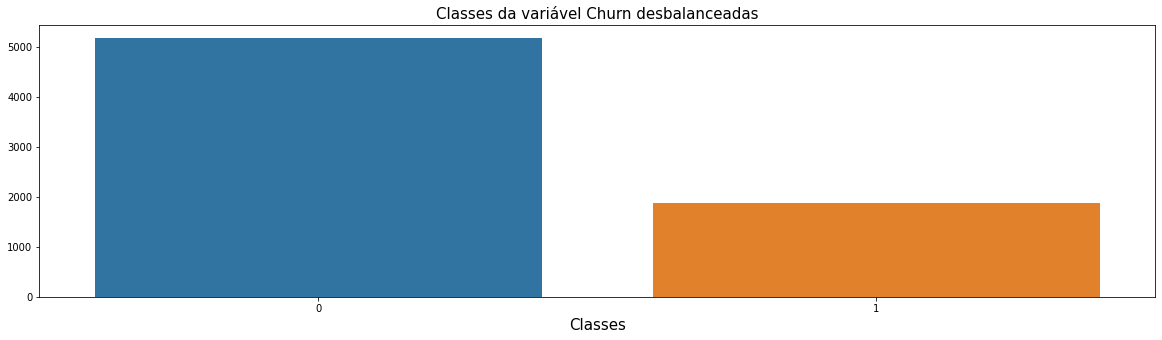

In [48]:
plt.figure(figsize=(20,5))
plt.title('Classes da variável Churn desbalanceadas', size=15)
sns.countplot(x='Churn', data=churn2)
plt.xlabel('Classes', size=15)
plt.ylabel('');

Rebalanceamento das classes com vários algoritmos de reamostragem de dados. Aqui irei aplicar model0s de *Oversampling*, de *Undersampling* e dessas duas técnicas de forma combinada.

In [49]:
#Algoritmos de Oversampling
X1,y1=SMOTE().fit_resample(X,y)
X2,y2=ADASYN().fit_resample(X,y)
X3,y3=BorderlineSMOTE().fit_resample(X,y)
X4,y4=SVMSMOTE().fit_resample(X,y)
X5,y5=KMeansSMOTE().fit_resample(X,y)
X6,y6=SMOTEN().fit_resample(X,y)
#X7,y7=SMOTENC().fit_resample(X,y)
X8,y8=RandomOverSampler().fit_resample(X,y)

#Algoritmos de Undersampling
X9,y9=RandomUnderSampler().fit_resample(X,y)
X10,y10=NearMiss().fit_resample(X,y)
X11,y11=EditedNearestNeighbours().fit_resample(X,y)
X12,y12=RepeatedEditedNearestNeighbours().fit_resample(X,y)
X13,y13=AllKNN().fit_resample(X,y)
#X14,y14=CondensedNearestNeighbour().fit_resample(X,y)
X15,y15=OneSidedSelection().fit_resample(X,y)
X16,y16=NeighbourhoodCleaningRule().fit_resample(X,y)
X17,y17=InstanceHardnessThreshold().fit_resample(X,y)

#Técnicas combinadas
X18,y18=SMOTEENN().fit_resample(X,y)
X19,y19=SMOTETomek().fit_resample(X,y)


Exemplo de reamostragem dos dados.

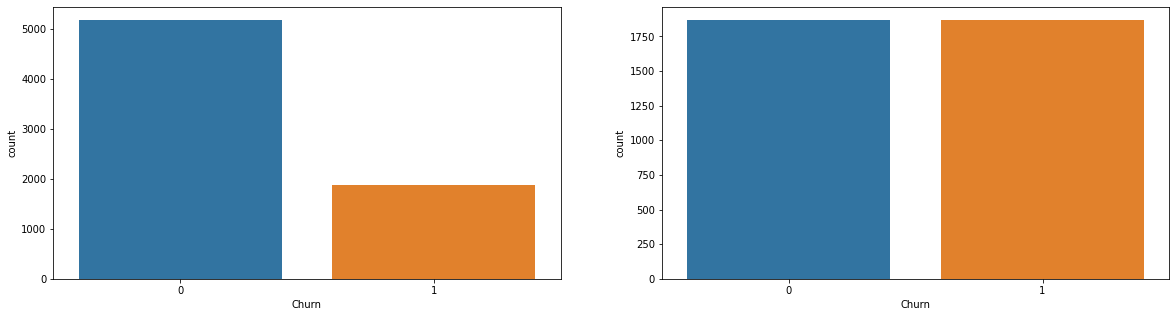

In [50]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='Churn', data=pd.DataFrame(y), ax=ax[0])
sns.countplot(x='Churn', data = pd.DataFrame(y9), ax=ax[1]);

Separando os dados de treino e de teste.

In [51]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=42)
X_treino1, X_teste1, y_treino1, y_teste1 = train_test_split(X1,y1, random_state=42)
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X2,y2, random_state=42)
X_treino3, X_teste3, y_treino3, y_teste3 = train_test_split(X3,y3, random_state=42)
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(X4,y4, random_state=42)
X_treino5, X_teste5, y_treino5, y_teste5 = train_test_split(X5,y5, random_state=42)
X_treino6, X_teste6, y_treino6, y_teste6 = train_test_split(X6,y6, random_state=42)
X_treino8, X_teste8, y_treino8, y_teste8 = train_test_split(X8,y8, random_state=42)
X_treino9, X_teste9, y_treino9, y_teste9 = train_test_split(X9,y9, random_state=42)
X_treino10, X_teste10, y_treino10, y_teste10 = train_test_split(X10,y10, random_state=42)
X_treino11, X_teste11, y_treino11, y_teste11 = train_test_split(X11,y11, random_state=42)
X_treino12, X_teste12, y_treino12, y_teste12 = train_test_split(X12,y12, random_state=42)
X_treino13, X_teste13, y_treino13, y_teste13 = train_test_split(X13,y13, random_state=42)
X_treino15, X_teste15, y_treino15, y_teste15 = train_test_split(X15,y15, random_state=42)
X_treino16, X_teste16, y_treino16, y_teste16 = train_test_split(X16,y16, random_state=42)
X_treino17, X_teste17, y_treino17, y_teste17 = train_test_split(X17,y17, random_state=42)
X_treino18, X_teste18, y_treino18, y_teste18 = train_test_split(X18,y18, random_state=42)
X_treino19, X_teste19, y_treino19, y_teste19 = train_test_split(X19,y19, random_state=42)

### Treinando os modelos

In [52]:
#Instanciando o modelo
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl.fit(pd.DataFrame(X_treino), pd.DataFrame(y_treino), dataset_name='churn')

automl1 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl1.fit(pd.DataFrame(X_treino1), pd.DataFrame(y_treino1), dataset_name='churn')

automl2 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl2.fit(pd.DataFrame(X_treino2), pd.DataFrame(y_treino2), dataset_name='churn')

automl3 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl3.fit(pd.DataFrame(X_treino3), pd.DataFrame(y_treino3), dataset_name='churn')

automl4 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl4.fit(pd.DataFrame(X_treino4), pd.DataFrame(y_treino4), dataset_name='churn')

automl5 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl5.fit(pd.DataFrame(X_treino5), pd.DataFrame(y_treino5), dataset_name='churn')

automl6 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl6.fit(pd.DataFrame(X_treino6), pd.DataFrame(y_treino6), dataset_name='churn')

automl8 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl8.fit(pd.DataFrame(X_treino8), pd.DataFrame(y_treino8), dataset_name='churn')

automl9 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl9.fit(pd.DataFrame(X_treino9), pd.DataFrame(y_treino9), dataset_name='churn')

automl10 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl10.fit(pd.DataFrame(X_treino10), pd.DataFrame(y_treino10), dataset_name='churn')

automl11 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl11.fit(pd.DataFrame(X_treino11), pd.DataFrame(y_treino11), dataset_name='churn')

automl12 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl12.fit(pd.DataFrame(X_treino12), pd.DataFrame(y_treino12), dataset_name='churn')

automl13 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl13.fit(pd.DataFrame(X_treino13), pd.DataFrame(y_treino13), dataset_name='churn')

automl15 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl15.fit(pd.DataFrame(X_treino15), pd.DataFrame(y_treino15), dataset_name='churn')

automl16 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl16.fit(pd.DataFrame(X_treino16), pd.DataFrame(y_treino16), dataset_name='churn')

automl17 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl17.fit(pd.DataFrame(X_treino17), pd.DataFrame(y_treino17), dataset_name='churn')

automl18 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl18.fit(pd.DataFrame(X_treino18), pd.DataFrame(y_treino18), dataset_name='churn')

automl19 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl19.fit(pd.DataFrame(X_treino19), pd.DataFrame(y_treino19), dataset_name='churn')

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)
automl.fit(pd.DataFrame(X_treino), pd.DataFrame(y_treino), dataset_name='churn')


[WARNING] [2021-03-28 18:46:00,135:Client-AutoMLSMBO(1)::churn] Dataset churn already in meta-data. Removing occurence.
[WARNING] [2021-03-28 18:46:15,289:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-28 18:46:19,376:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-28 18:46:25,491:Client-AutoMLSMBO(1)::churn] Dataset churn already in meta-data. Removing occurence.
[WARNING] [2021-03-28 18:46:49,390:Client-AutoMLSMBO(1)::churn] Dataset churn already in meta-data. Removing occurence.
[WARNING] [2021-03-28 18:47:14,461:Client-AutoMLSMBO(1)::churn] Dataset churn already in meta-data. Removing occurence.
[WARNING] [2021-03-28 18:47:40,218:Client-AutoMLSMBO(1)::churn] Dataset churn already in meta-data. Removing occurence.
[WARNING] [2021-03-28 18:48:04,819

AutoSklearnClassifier(per_run_time_limit=3, time_left_for_this_task=30)

Imprimindo os modelos

In [58]:
#print(automl.show_models())

print(automl1.show_models())

print(automl2.show_models())

print(automl3.show_models())

print(automl4.show_models())

print(automl5.show_models())

print(automl6.show_models())

print(automl8.show_models())

print(automl9.show_models())

print(automl10.show_models())

print(automl11.show_models())

print(automl12.show_models())

print(automl13.show_models())

#print(automl15.show_models())

print(automl16.show_models())

print(automl17.show_models())

print(automl18.show_models())

print(automl19.show_models())


[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gaussian_nb', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.004240052356842208},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
]
[(0.680000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gaussian_nb', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_ho

### Avaliação dos Modelos

Abaixo podemos ver o desempenho de cada modelo pela métrica de acurácia. O melhor modelo foi o 17 que usou a algoritmo de *undersampling* *InstanceHardnessThreshold*.

In [59]:
print("Acurácia dos modelos")
print(""*254)
print('Modelos com Algoritmos de Oversampling')
predictions = automl.predict(X_teste)
print("Acurária do modelo principal:", sklearn.metrics.accuracy_score(y_teste, predictions))

predictions1 = automl1.predict(X_teste1)
print("Acurária do modelo 1:", sklearn.metrics.accuracy_score(y_teste1, predictions1))

predictions2 = automl2.predict(X_teste2)
print("Acurária do modelo 2:", sklearn.metrics.accuracy_score(y_teste2, predictions2))

predictions3 = automl3.predict(X_teste3)
print("Acurária do modelo 3:", sklearn.metrics.accuracy_score(y_teste3, predictions3))

predictions4 = automl4.predict(X_teste4)
print("Acurária do modelo 4:", sklearn.metrics.accuracy_score(y_teste4, predictions4))

predictions5 = automl5.predict(X_teste5)
print("Acurária do modelo 5:", sklearn.metrics.accuracy_score(y_teste5, predictions5))

predictions6 = automl6.predict(X_teste6)
print("Acurária do modelo 6:", sklearn.metrics.accuracy_score(y_teste6, predictions6))

predictions8 = automl8.predict(X_teste8)
print("Acurária do modelo 8:", sklearn.metrics.accuracy_score(y_teste8, predictions8))

print(""*254)
print('Modelos com Algoritmos de Undersampling')
predictions9 = automl9.predict(X_teste9)
print("Acurária do modelo 9:", sklearn.metrics.accuracy_score(y_teste9, predictions9))

predictions10 = automl10.predict(X_teste10)
print("Acurária do modelo 10:", sklearn.metrics.accuracy_score(y_teste10, predictions10))

predictions11 = automl11.predict(X_teste11)
print("Acurária do modelo 11:", sklearn.metrics.accuracy_score(y_teste11, predictions11))

predictions12 = automl12.predict(X_teste12)
print("Acurária do modelo 12:", sklearn.metrics.accuracy_score(y_teste12, predictions12))

predictions13 = automl13.predict(X_teste13)
print("Acurária do modelo 13:", sklearn.metrics.accuracy_score(y_teste13, predictions13))

predictions15 = automl15.predict(X_teste15)
print("Acurária do modelo 15:", sklearn.metrics.accuracy_score(y_teste15, predictions15))

predictions16 = automl16.predict(X_teste16)
print("Acurária do modelo 16:", sklearn.metrics.accuracy_score(y_teste16, predictions16))

predictions17 = automl17.predict(X_teste17)
print("Acurária do modelo 17:", sklearn.metrics.accuracy_score(y_teste17, predictions17))

print(""*254)
print('Modelos com Algoritmos de Técnica combinadas')
predictions18 = automl18.predict(X_teste18)
print("Acurária do modelo 18:", sklearn.metrics.accuracy_score(y_teste18, predictions18))

predictions19 = automl19.predict(X_teste19)
print("Acurária do modelo 19:", sklearn.metrics.accuracy_score(y_teste19, predictions19))

Acurácia dos modelos

Modelos com Algoritmos de Oversampling
Acurária do modelo principal: 0.7279954571266326
Acurária do modelo 1: 0.7734827986084267
Acurária do modelo 2: 0.7364370911889189
Acurária do modelo 3: 0.7564746810977967
Acurária do modelo 4: 0.7680711248550445
Acurária do modelo 5: 0.8318515655199072
Acurária do modelo 6: 0.7672980286045613
Acurária do modelo 8: 0.766524932354078

Modelos com Algoritmos de Undersampling
Acurária do modelo 9: 0.7625668449197861
Acurária do modelo 10: 0.6524064171122995
Acurária do modelo 11: 0.869281045751634
Acurária do modelo 12: 0.9138257575757576
Acurária do modelo 13: 0.8753292361720808
Acurária do modelo 15: 0.7254901960784313
Acurária do modelo 16: 0.853125
Acurária do modelo 17: 0.9191709844559586

Modelos com Algoritmos de Técnica combinadas
Acurária do modelo 18: 0.9213973799126638
Acurária do modelo 19: 0.7760162601626016


Abaixo vamos ver a diferença de desempenho dos modelos em seus dados de treino e de teste para saber se há algum problema de *overfitting* (sobreajuste do modelo) ou *underfitting* (subajuste do modelo), pois o que quero é um modelo que possa ser generalizável.

Novamente o modelo 17 ( que usa o algoritmo *InstanceHardnessThreshold*) de o melhor resultado.

In [60]:
print('Training score do modelo principal:',round(automl.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo principal:',round(automl.score(X_teste,y_teste)*100,3),'%')
print(''*254)

print('Training score do modelo 1:',round(automl1.score(X_treino1,y_treino1)*100,3),'%')
print('Testing score do modelo 1:',round(automl1.score(X_teste1,y_teste1)*100,3),'%')
print(''*254)

print('Training score do modelo 2:',round(automl2.score(X_treino2,y_treino2)*100,3),'%')
print('Testing score do modelo 2:',round(automl2.score(X_teste2,y_teste2)*100,3),'%')
print(''*254)

print('Training score do modelo 3:',round(automl3.score(X_treino3,y_treino3)*100,3),'%')
print('Testing score do modelo 3:',round(automl3.score(X_teste3,y_teste3)*100,3),'%')
print(''*254)

print('Training score do modelo 4:',round(automl4.score(X_treino4,y_treino4)*100,3),'%')
print('Testing score do modelo 4:',round(automl4.score(X_teste4,y_teste4)*100,3),'%')
print(''*254)

print('Training score do modelo 5:',round(automl5.score(X_treino5,y_treino5)*100,3),'%')
print('Testing score do modelo 5:',round(automl5.score(X_teste5,y_teste5)*100,3),'%')
print(''*254)

print('Training score do modelo 6:',round(automl6.score(X_treino6,y_treino6)*100,3),'%')
print('Testing score do modelo 6:',round(automl6.score(X_teste6,y_teste6)*100,3),'%')
print(''*254)

print('Training score do modelo 8:',round(automl8.score(X_treino8,y_treino8)*100,3),'%')
print('Testing score do modelo 8:',round(automl8.score(X_teste8,y_teste8)*100,3),'%')
print(''*254)

print('Training score do modelo 9:',round(automl9.score(X_treino9,y_treino9)*100,3),'%')
print('Testing score do modelo 9:',round(automl9.score(X_teste9,y_teste9)*100,3),'%')
print(''*254)

print('Training score do modelo 10:',round(automl10.score(X_treino10,y_treino10)*100,3),'%')
print('Testing score do modelo 10:',round(automl10.score(X_teste10,y_teste10)*100,3),'%')
print(''*254)

print('Training score do modelo 11:',round(automl11.score(X_treino11,y_treino11)*100,3),'%')
print('Testing score do modelo 11:',round(automl11.score(X_teste11,y_teste11)*100,3),'%')
print(''*254)

print('Training score do modelo 12:',round(automl12.score(X_treino12,y_treino12)*100,3),'%')
print('Testing score do modelo 12:',round(automl12.score(X_teste12,y_teste12)*100,3),'%')
print(''*254)

print('Training score do modelo 13:',round(automl13.score(X_treino13,y_treino13)*100,3),'%')
print('Testing score do modelo 13:',round(automl13.score(X_teste13,y_teste13)*100,3),'%')
print(''*254)

print('Training score do modelo 15:',round(automl15.score(X_treino15,y_treino15)*100,3),'%')
print('Testing score do modelo 15:',round(automl15.score(X_teste15,y_teste15)*100,3),'%')
print(''*254)

print('Training score do modelo 16:',round(automl16.score(X_treino16,y_treino16)*100,3),'%')
print('Testing score do modelo 16:',round(automl16.score(X_teste16,y_teste16)*100,3),'%')
print(''*254)

print('Training score do modelo 17:',round(automl17.score(X_treino17,y_treino17)*100,3),'%')
print('Testing score do modelo 17:',round(automl17.score(X_teste17,y_teste17)*100,3),'%')
print(''*254)

print('Training score do modelo 18:',round(automl18.score(X_treino18,y_treino18)*100,3),'%')
print('Testing score do modelo 18:',round(automl18.score(X_teste18,y_teste18)*100,3),'%')
print(''*254)

print('Training score do modelo 19:',round(automl19.score(X_treino19,y_treino19)*100,3),'%')
print('Testing score do modelo 19:',round(automl19.score(X_teste19,y_teste19)*100,3),'%')

Training score do modelo principal: 73.684 %
Testing score do modelo principal: 72.8 %

Training score do modelo 1: 76.768 %
Testing score do modelo 1: 77.348 %

Training score do modelo 2: 74.304 %
Testing score do modelo 2: 73.644 %

Training score do modelo 3: 75.596 %
Testing score do modelo 3: 75.647 %

Training score do modelo 4: 76.794 %
Testing score do modelo 4: 76.807 %

Training score do modelo 5: 81.33 %
Testing score do modelo 5: 83.185 %

Training score do modelo 6: 76.82 %
Testing score do modelo 6: 76.73 %

Training score do modelo 8: 74.939 %
Testing score do modelo 8: 76.652 %

Training score do modelo 9: 75.598 %
Testing score do modelo 9: 76.257 %

Training score do modelo 10: 68.498 %
Testing score do modelo 10: 65.241 %

Training score do modelo 11: 87.745 %
Testing score do modelo 11: 86.928 %

Training score do modelo 12: 90.625 %
Testing score do modelo 12: 91.383 %

Training score do modelo 13: 90.305 %
Testing score do modelo 13: 87.533 %

Training score do m

#### Relatórios dos melhores modelos

Aqui só serão analisados as métricas de avaliação dos modelos que tiveram melhor desempenho anteriormente. Destaquei os modelos 12, 13, 17 e 18.

Abaixo podemos ver o relatório das métricas do modelo 12 e é importante notar aqui que tanto a precisão das classes (*precision*) quanto a sensibilidade (*recall*) estão bem próximos; e as métricas desse modelo estão acima de 90%, que mostra que esse é um bom modelo preditor.

In [ ]:
valor_classe=[0,1]
print(classification_report(y12,cross_val_predict(automl12,X12,y12,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2378
           1       0.94      0.90      0.92      1869

    accuracy                           0.93      4247
   macro avg       0.93      0.93      0.93      4247
weighted avg       0.93      0.93      0.93      4247



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


O modelo 13 já possui um desempenho menor na classe 1 (deixou de ser cliente), mas a suas métricas estão bem próximas uma das outras e bem próximas de 90% no geral.

In [ ]:
valor_classe=[0,1]
print(classification_report(y13,cross_val_predict(automl13,X13,y13,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2652
           1       0.88      0.85      0.87      1869

    accuracy                           0.89      4521
   macro avg       0.89      0.89      0.89      4521
weighted avg       0.89      0.89      0.89      4521



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


O desempenho do modelo 18 foi um pouco pior na classe 0, mas teve um bom resultado para prever a classe 1 (93% de precisão e 90% de *recall*).

In [ ]:
valor_classe=[0,1]
print(classification_report(y18,cross_val_predict(automl18,X18,y18,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2792
           1       0.93      0.90      0.92      3516

    accuracy                           0.91      6308
   macro avg       0.91      0.91      0.91      6308
weighted avg       0.91      0.91      0.91      6308



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


O modelo 17 foi o melhor, tanto em acurácia, como em *testing score* e *training score*, com nas métricas de precisão e *recall*.

Esse modelo está usando uma técnica de reamostragem *undersampling*, ou seja, houve uma redução nos dados de marjoritários.

In [ ]:
valor_classe=[0,1]
print(classification_report(y17,cross_val_predict(automl17,X17,y17,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1961
           1       0.97      0.93      0.95      1869

    accuracy                           0.95      3830
   macro avg       0.95      0.95      0.95      3830
weighted avg       0.95      0.95      0.95      3830



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


#### Matrizes de confusão

Uma outra forma de avaliar o desempenho dos modelos é usar a matriz de confusão, que compara os valores preditos com os valores reais de forma visual.

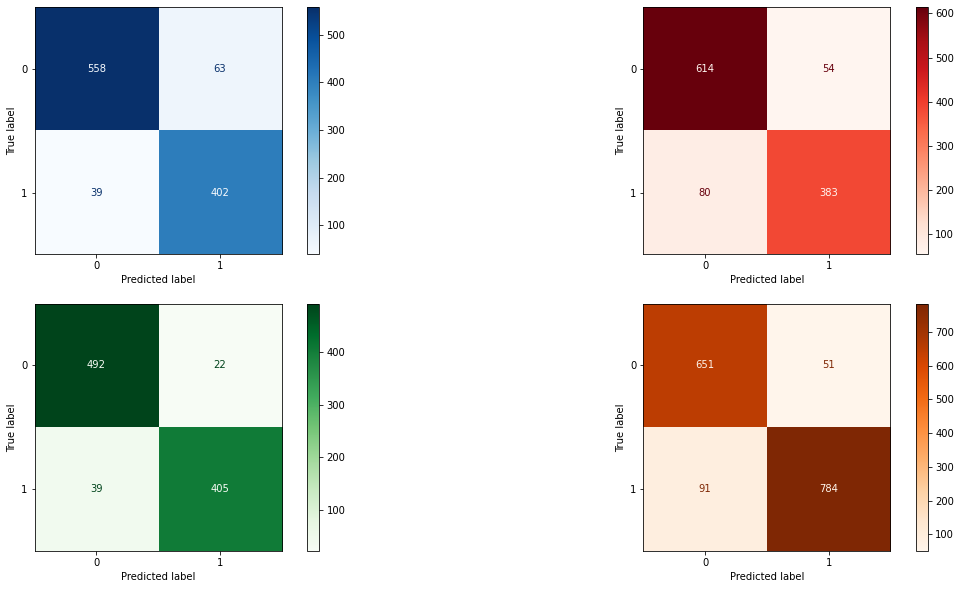

In [ ]:
fig, ax= plt.subplots(2,2, figsize=(20,10))
disp=plot_confusion_matrix(automl12,X_teste12,y_teste12,cmap='Blues',values_format='.5g', ax=ax[0][0])
disp=plot_confusion_matrix(automl13,X_teste13,y_teste13,cmap='Reds',values_format='.5g', ax=ax[0][1])
disp=plot_confusion_matrix(automl17,X_teste17,y_teste17,cmap='Greens',values_format='.5g', ax=ax[1][0])
disp=plot_confusion_matrix(automl18,X_teste18,y_teste18,cmap='Oranges',values_format='.5g', ax=ax[1][1])

#### Curva *ROC* e AUC

Por fim, vamos plotar a curva *ROC* e gerar o AUC.

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

A curva *ROC* possui dois parâmetros:

1) Taxa de verdadeiro positivo (True Positive Rate), que é dado por 

$\frac{true positives}{(true positives + false negatives)}$

Taxa de falso positivo (False Positive Rate), que é dado por $\frac{false positives}{(true positives + false negatives)}$

O valor do AUC varia de 0.0 até 1.0 e é a área abaixo da curva *ROC*, tendo comoo limiar entre as classes o valor de 0.5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.

Abaixo geramos as curvas *ROC* e os valores de *AUC* para cada modelo treinado. Vê-se que o melhor modelo foi o 17.

<Figure size 1440x720 with 0 Axes>

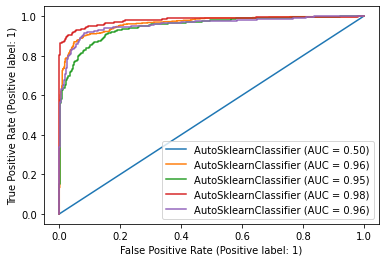

In [ ]:
plt.figure(figsize=(20,10))
disp=plot_roc_curve(automl,X_teste,y_teste)
plot_roc_curve(automl12,X_teste12,y_teste12, ax=disp.ax_);
plot_roc_curve(automl13,X_teste13,y_teste13, ax=disp.ax_);
plot_roc_curve(automl17,X_teste17,y_teste17, ax=disp.ax_);
plot_roc_curve(automl18,X_teste18,y_teste18, ax=disp.ax_);
plt.show()

## Conclusão

Nesse pequeno projeto apliquei a biblioteca *Auto-Sklearn* para modelagem de dados de *churn* de clientes de uma empresa e classificá-los com base nas suas *features*. O uso dessa ferramenta também dispensou a uso de vários modelos de classificação.

Além disso, utilizei algoritmos da biblioteca *imblearn* para reamostragem dos dados, pois as classes da variável alvo *Churn* estavam desbalanceadas.

Encontrei, então, um modelo que classifica a classe 1 com uma acurácia de 93%, precisão de 97%, *recall* de 94% e um AUC de 98%.